# Décroissance radioactive

<div class = 'alert alert-info'>
Pour exécuter le code écrit dans un bloc : <b>MAJ-ENTREE </b><br>
    Pour recommencer depuis le début : Menu <b>Kernel / Restart and clear output </b><br>
    Toujours exécuter dans l'ordre le code  écrit dans les blocs précédés de la mention <b>Entrée  [  ]</b>
</div>

<div class = 'alert alert-warning'>Importation des modules de calcul et de tracé de courbe.
    </div>

In [1]:
import numpy as np
import matplotlib.pylab as plt

## I. Activité d'une population de noyaux radioactifs.

<div class = 'alert alert-warning'><h3>I.1 Mesures de l'activité d'une population de noyaux radioactifs.</h3><br>
    On dispose de mesures de l'activité radioactive effectuées sur une population de noyaux de radon 220.<br>
    Les mesures ont été rassemblées dans les deux listes <code class = "python">A_mesure</code> et <code class = "python">t_mesure</code> correspondant aux activités mesurées en Bequerel (Bq) et aux dates respectives (en s).
</div>

In [2]:
t_mesure = [0, 7, 14, 21, 28, 35, 42, 49, 56, 63,
            70, 77, 84, 91, 98, 105, 112, 119, 126, 133, 140, 147, 154, 161, 168]
t_max = max(t_mesure)         # renvoie la valeur maximale du tableau 
A_mesure = [230, 189, 196, 160, 150, 150, 131, 124, 100,
            105, 91, 80, 81, 72, 70, 55, 50, 51, 45, 46, 44, 31, 34, 26, 31]


<div class = 'alert alert-warning'>
  <H3>I.2 Représentation graphique des mesures</H3><br>  

<div class = 'alert alert-info'>
    Compléter le code qui permet de représenter <code class = "python">A_mesure</code> en fonction de <code class = "python">t_mesure</code>.
</div>

Text(0, 0.5, ' A en Bq')

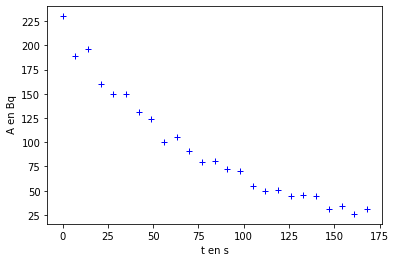

In [4]:
plt.plot(t_mesure , A_mesure ,"+", color = "blue")
plt.xlabel ("t en s" )
plt.ylabel (" A en Bq" ) 

<div class = 'alert alert-warning'><h3>I.3 Constante radioactive.</h3><br>
    L'activité A(t) est le nombre de désintégration par unité de temps dans une population de noyaux radioactifs.<br>
    Elle correspond donc 
    $$
    A(t) = - \frac {dN(t)} {dt}
    $$
    <br>
    La constante radioactive λ d'un noyau relie le nombre de noyaux présents et l'activité.
    $$
    A(t) = \lambda \times N(t)
    $$
    l'activité s'exprime en Becquerel (Bq) et la constante radioactive en s<sup>-1</sup>.
</div>
<div class = 'alert alert-info'>
    Sur le compte-rendu, démontrer que
    $$
    \frac{ dA(t)}{dt} = - \lambda \times A(t) 
    $$   
</div>

<div class = 'alert alert-warning'><h3>Valeur de la constante radioactive du radon 220</h3>
    </div>

In [6]:
lambda_Rn = 0.0125     # en s-1

## II. Modélisation par la méthode d'Euler.

On cherche ici à à réaliser une prédiction théorique de la courbe décroissance à l'aide d'une méthode itérative appellée "Méthode d'Euler". On comparera ensuite cette prédiction à la courbe expérimentale précédemment tracée.

<div class = 'alert alert-warning'>
  <H3>II.1 Présentation de la méthode d'Euler</H3><br>  
   La méthode d'Euler donne une approximation de la valeur de A à la date t+Δt en considérant que A(t) va s'accroître de 
    $$
    \Delta A =\frac{ dA(t)}{dt}  \times \Delta t 
    $$
    <br> et donc, comme $\Delta A = A(t + \Delta t) -A(t)$ alors :
    $$
    A(t + \Delta t) = A(t) + \frac{ dA(t)}{dt}  \times \Delta t 
    $$
    <br>  <br> 
    A partir du résultat de la question précédente, on peut 
    écrire la valeur de l'activité A à la date t+Δt en fonction de A(t) et de son taux d'accroissement.
    $$
    A(t + \Delta t ) = A(t) - \lambda \times A(t)  \times \Delta t
    $$
</div>
<div class = 'alert alert-info'>
    a) Sur le compte-rendu, en supposant que A(0) = 230 Bq, calculer A à la date t = 1 s.<br>
    b) Déterminer le terme suivant en "avançant" encore d'une seconde.
</div>

<div class = 'alert alert-warning'><h3>II.2 Calcul des valeurs d'activité prédites par la méthode d'Euler.</h3><br>
Compléter le code (formules ou commentaires) ci-dessous permettant de calculer, sur un nombre de points défini <code class = "python">nombre_points</code>,  les valeurs d'activités à intervalles de temps <code class = "python">delta_t</code> réguliers.<br>

In [17]:
A_prédit = A_mesure[0]          # initialisation des valeurs avant de commencer les boucles de calcul
date = 0
    
A = np.array(A_mesure[0])       # créations de 2 tableaux "numpy" ne contenant que la première valeur
t = np.array(0)         

nombre_points = 4              # nbre de points à calculer sur l'intervalle de temps entre t = 0 et t_max
delta_t = t_max /nombre_points                 # calcul de la durée entre 2 points

for i in range(nombre_points):    
        A_prédit = A_prédit*(1 - lambda_Rn*delta_t)  # calcul de l'activité à la date t + delta_t à partir de celle à la date t
        A = np.append(A,A_prédit)    # ....
        date = date + delta_t       # on passe de la date t à t + delta_t
        t = np.append(t,date)        # ....

## III. Comparaison expérience-modèle théorique.

<div class = 'alert alert-warning'>Représentation graphique des valeurs mesurées et des valeurs calculées par la modélistaion
    </div>


<div class = 'alert alert-info'>
   a) Ecrire ci-dessous le code qui permet de représenter sur le même graphe <br>
    - <code class = "python">A_mesure</code> en fonction de <code class = "python">t_mesure</code> d'une part<br>
    - <code class = "python">A_prédit</code> en fonction de <code class = "python">date</code> d'autre part.<br>
    On pourra changer la couleur du tracé et remplacer les croix <code class = "python">+</code> par des points reliés par des segments <code class = "python">-o</code> pour le tracé de la modélisation.
</div>

Text(0, 0.5, ' A en Bq')

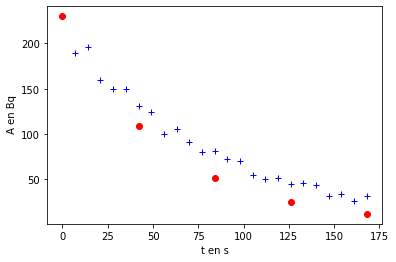

In [20]:
plt.plot(t_mesure , A_mesure ,"+", color = "blue")
plt.plot(t,A,"o", color = "red")
plt.xlabel ("t en s" )
plt.ylabel (" A en Bq" ) 

<div class = 'alert alert-info'>
   b) La modélisation est-elle conforme aux mesures expérimentales ? Pourquoi? <br>
   c) Proposer et tester un moyen d'améliorer la modélisation. <br>
</div>